In [ ]:

# Import the necessary libraries
import numpy as np
import torch
import matplotlib.pyplot as plt

In [ ]:
# Loading the Fashion-MNIST dataset
from torchvision import datasets, transforms

# Define a transform to normalize the data
#transform = transforms.Compose([transforms.ToTensor(),
                             #   transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
                             #  ])
transform = transforms.Compose([transforms.ToTensor(),
  transforms.Normalize((0.5,), (0.5,))
])

# Download and load the training data
trainset = datasets.FashionMNIST('MNIST_data/', download = True, train = True, transform = transform)
testset = datasets.FashionMNIST('MNIST_data/', download = True, train = False, transform = transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size = 64, shuffle = True)
testloader = torch.utils.data.DataLoader(testset, batch_size = 64, shuffle = True)

In [ ]:
# Examine a sample
dataiter = iter(trainloader)
images, labels = dataiter.next()
print(type(images))
print(images.shape)
print(labels.shape)

<class 'torch.Tensor'>
torch.Size([64, 1, 28, 28])
torch.Size([64])


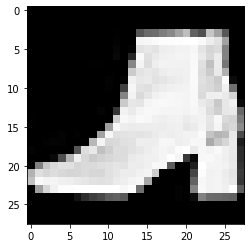

In [ ]:
plt.imshow(images[1].numpy().squeeze(), cmap = 'Greys_r')


In [ ]:
# Define the network architecture
from torch import nn, optim
import torch.nn.functional as F

model = nn.Sequential(nn.Linear(784, 256),
                      nn.ReLU(),
                      nn.Dropout(0.2),
                      nn.Linear(256, 128),
                      nn.ReLU(),
                      nn.Dropout(0.2),
                      nn.Linear(128, 64),
                      nn.ReLU(),
                      nn.Dropout(0.2),
                      nn.Linear(64, 10),
                      nn.LogSoftmax(dim = 1)
                     )

# Define the loss
criterion = nn.NLLLoss()

# Define the optimizer
optimizer = optim.Adam(model.parameters(), lr = 0.002)

# Define the epochs
epochs = 30

train_losses, test_losses = [], []

for e in range(epochs):
  running_loss = 0
  for images, labels in trainloader:
    # Flatten Fashion-MNIST images into a 784 long vector
    images = images.view(images.shape[0], -1)
    
    # Training pass
    optimizer.zero_grad()
    
    output = model.forward(images)
    loss = criterion(output, labels)
    loss.backward()
    optimizer.step()
    
    running_loss += loss.item()
  else:
    test_loss = 0
    accuracy = 0
    
    # Turn off gradients for validation, saves memory and computation
    with torch.no_grad():
      # Set the model to evaluation mode
      model.eval()
      
      # Validation pass
      for images, labels in testloader:
        images = images.view(images.shape[0], -1)
        log_ps = model(images)
        test_loss += criterion(log_ps, labels)
        
        ps = torch.exp(log_ps)
        top_p, top_class = ps.topk(1, dim = 1)
        equals = top_class == labels.view(*top_class.shape)
        accuracy += torch.mean(equals.type(torch.FloatTensor))
    
    model.train()
    train_losses.append(running_loss/len(trainloader))
    test_losses.append(test_loss/len(testloader))
    
    print("Epoch: {}/{}..".format(e+1, epochs),
          "Training loss: {:.3f}..".format(running_loss/len(trainloader)),
          "Test loss: {:.3f}..".format(test_loss/len(testloader)),
          "Test Accuracy: {:.3f}".format(accuracy/len(testloader)))

Epoch: 1/30.. Training loss: 0.589.. Test loss: 0.459.. Test Accuracy: 0.834
Epoch: 2/30.. Training loss: 0.458.. Test loss: 0.456.. Test Accuracy: 0.833
Epoch: 3/30.. Training loss: 0.420.. Test loss: 0.399.. Test Accuracy: 0.858
Epoch: 4/30.. Training loss: 0.399.. Test loss: 0.392.. Test Accuracy: 0.858
Epoch: 5/30.. Training loss: 0.389.. Test loss: 0.385.. Test Accuracy: 0.861
Epoch: 6/30.. Training loss: 0.371.. Test loss: 0.388.. Test Accuracy: 0.864
Epoch: 7/30.. Training loss: 0.360.. Test loss: 0.357.. Test Accuracy: 0.874
Epoch: 8/30.. Training loss: 0.352.. Test loss: 0.364.. Test Accuracy: 0.869
Epoch: 9/30.. Training loss: 0.348.. Test loss: 0.360.. Test Accuracy: 0.877
Epoch: 10/30.. Training loss: 0.343.. Test loss: 0.364.. Test Accuracy: 0.874
Epoch: 11/30.. Training loss: 0.334.. Test loss: 0.390.. Test Accuracy: 0.871
Epoch: 12/30.. Training loss: 0.334.. Test loss: 0.350.. Test Accuracy: 0.873
Epoch: 13/30.. Training loss: 0.325.. Test loss: 0.351.. Test Accuracy: 0

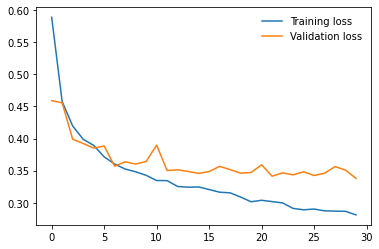

In [ ]:
plt.plot(train_losses, label = "Training loss")
plt.plot(test_losses, label = "Validation loss")
plt.legend(frameon = False)

In [ ]:
# Define view_classify function
def view_classify(img, ps, version="MNIST"):
    ''' Function for viewing an image and it's predicted classes.
    '''
    ps = ps.data.numpy().squeeze()

    fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
    ax1.imshow(img.resize_(1, 28, 28).numpy().squeeze())
    ax1.axis('off')
    ax2.barh(np.arange(10), ps)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))
    if version == "MNIST":
        ax2.set_yticklabels(np.arange(10))
    elif version == "Fashion":
        ax2.set_yticklabels(['T-shirt/top',
                            'Trouser',
                            'Pullover',
                            'Dress',
                            'Coat',
                            'Sandal',
                            'Shirt',
                            'Sneaker',
                            'Bag',
                            'Ankle Boot'], size='small');
    ax2.set_title('Class Probability')
    ax2.set_xlim(0, 1.1)

    plt.tight_layout()

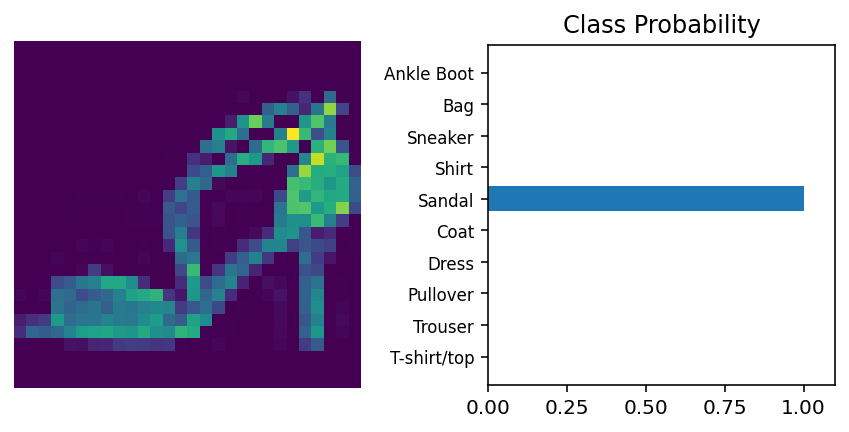

In [91]:

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
# Testing out the network
dataiter = iter(testloader)
images, labels = dataiter.next()
img = images[0]

# Convert 2D image to 1D vector
img = img.resize_(1, 784)

# Calculate the class probabilites (log softmax) for img
ps = torch.exp(model(img))

# Plot the image and probabilites
view_classify(img, ps, version='Fashion')

In [87]:
# Specify a path
PATH = "./entire_model_v2.pt"

# Save
torch.save(model, PATH)


In [ ]:
from PIL import Image


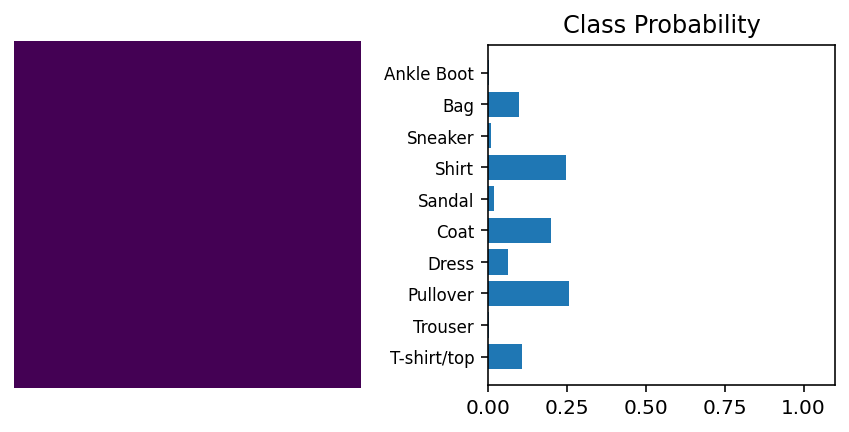

In [96]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

img = Image.open("shoe.png")
trans = transforms.ToTensor()
img = trans(img)
# Convert 2D image to 1D vector
img = img.resize_(1, 784)

#img.resize_(1, 3, 28, 28)
# Calculate the class probabilites (log softmax) for img
ps = torch.exp(model(img))

# Plot the image and probabilites
view_classify(img, ps, version='Fashion')

In [94]:
transform = transforms.Compose([transforms.ToTensor(),
  transforms.Normalize((0.5,), (0.5,))